# *SALE PRICE PREDICTION NYC SALES*

## Importing Data and Others

In [4455]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("nyc-rolling-sales.csv")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

## Presenting the Data

In [4456]:
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [4457]:
df.shape

(84548, 22)

In [4458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

As it is possible to se, we have several different types of data that are both categorical and continous. 

The countinous being :
- Sale Price
- Land Square Feet
- Gross Square Feet
- Year Built
- Sale Date (Which will be converted to Month Sold and Year Sold)

# Cleaning the Data

In [4459]:
#Checking for any duplicates

sum(df.duplicated(df.columns))

0

In [4460]:
# Removing duplicates

df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [4461]:
#Checking if there are any null values in the dataframe

df.isna().any(), df.isnull().any()

(Unnamed: 0                        False
 BOROUGH                           False
 NEIGHBORHOOD                      False
 BUILDING CLASS CATEGORY           False
 TAX CLASS AT PRESENT              False
 BLOCK                             False
 LOT                               False
 EASE-MENT                         False
 BUILDING CLASS AT PRESENT         False
 ADDRESS                           False
 APARTMENT NUMBER                  False
 ZIP CODE                          False
 RESIDENTIAL UNITS                 False
 COMMERCIAL UNITS                  False
 TOTAL UNITS                       False
 LAND SQUARE FEET                  False
 GROSS SQUARE FEET                 False
 YEAR BUILT                        False
 TAX CLASS AT TIME OF SALE         False
 BUILDING CLASS AT TIME OF SALE    False
 SALE PRICE                        False
 SALE DATE                         False
 dtype: bool, Unnamed: 0                        False
 BOROUGH                           False
 NE

In [4462]:
# Replacing empty or '-' values with NaN

df = df.replace(' ', np.nan)
df = df.replace(' -  ', np.nan)

In [4463]:
#An overview of where there is any NaN values

print("Percentage null or na values in Dataset\n-------------------------------------")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in Dataset
-------------------------------------


Unnamed: 0                          0.00
BOROUGH                             0.00
NEIGHBORHOOD                        0.00
BUILDING CLASS CATEGORY             0.00
TAX CLASS AT PRESENT                0.87
BLOCK                               0.00
LOT                                 0.00
EASE-MENT                         100.00
BUILDING CLASS AT PRESENT           0.87
ADDRESS                             0.00
APARTMENT NUMBER                   77.47
ZIP CODE                            0.00
RESIDENTIAL UNITS                   0.00
COMMERCIAL UNITS                    0.00
TOTAL UNITS                         0.00
LAND SQUARE FEET                   31.05
GROSS SQUARE FEET                  32.66
YEAR BUILT                          0.00
TAX CLASS AT TIME OF SALE           0.00
BUILDING CLASS AT TIME OF SALE      0.00
SALE PRICE                         17.22
SALE DATE                           0.00
dtype: float64

### Removing some of the features

Before further inspections, we decided to remove some of the features. These are:

- "Unnamed: 0" : Dropping as it looks like an iterator

- "EASEMENT" : Because it only contains NaN values

- "APARTMENT NUMBER" : The number of the apartment is not relevant for sale price

- "ADDRESS" : The address of the apartment is not relevant for the sale price

- "ZIP CODE" : Not relevant

- "BLOCK" : Not relevant

- "LOT" : Not relvant

In [4464]:
df = df.drop(['Unnamed: 0', 'ZIP CODE', 'BLOCK', 'LOT', 'ADDRESS', 'EASE-MENT', 'APARTMENT NUMBER'], axis=1)

## Cleaning Sale Price

In [4465]:
#Dropping all the NaN values

df = df.dropna(subset=['SALE PRICE'])

In [4466]:
#Converting ['SALE PRICE'] from object to float

df["SALE PRICE"] = df["SALE PRICE"].astype(float)

In [4467]:
df['SALE PRICE'].describe()

count    6.998700e+04
mean     1.276456e+06
std      1.140526e+07
min      0.000000e+00
25%      2.250000e+05
50%      5.300000e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [4468]:
#Checking how the values look

df['SALE PRICE'].value_counts().head(10)

0.0         10228
10.0          766
450000.0      427
550000.0      416
650000.0      414
600000.0      409
700000.0      382
400000.0      378
750000.0      377
300000.0      351
Name: SALE PRICE, dtype: int64

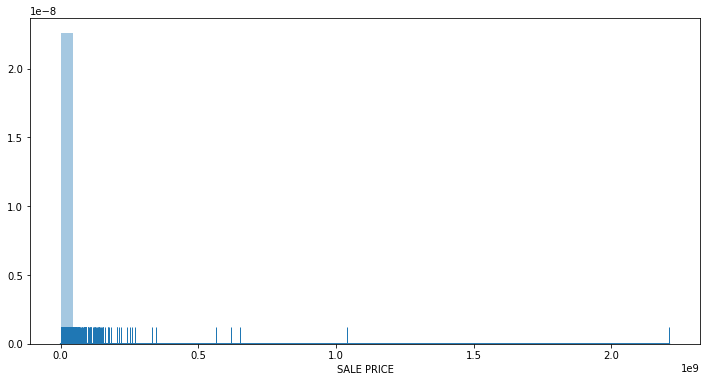

In [4469]:
plt.figure(figsize=(12,6))
sns.distplot(df['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

In [4470]:
df[(df['SALE PRICE'] < 10000) | (df['SALE PRICE'] > 10000000)]['SALE PRICE'].count() /len(df) 

0.17820452369725806

In [4471]:
df= df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE']<10000000)]

In [4472]:
df['SALE PRICE'].value_counts().head(10)

450000.0    427
550000.0    416
650000.0    414
600000.0    409
700000.0    382
400000.0    378
750000.0    377
300000.0    351
500000.0    350
350000.0    345
Name: SALE PRICE, dtype: int64

## Cleaning Square Feet

There are a lot of missing values in these important features.
We can either fill them up with the mean average or remove them like this:

For the time being, lets remove this missing features

In [4473]:
#Dropping all the NaN values

df = df.dropna(subset=['LAND SQUARE FEET'])
df = df.dropna(subset=['GROSS SQUARE FEET'])

In [4474]:
#Converting from object to float

df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype(float)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype(float)

In [4475]:
df['LAND SQUARE FEET'].value_counts().head(10)

0.0       8034
2000.0    2350
2500.0    2084
4000.0    1863
1800.0     758
3000.0     741
5000.0     572
2400.0     328
1900.0     307
6000.0     281
Name: LAND SQUARE FEET, dtype: int64

In [4476]:
df['GROSS SQUARE FEET'].value_counts().head(10)

0.0       8460
1800.0     243
1600.0     235
1440.0     234
2400.0     231
2000.0     223
1200.0     203
1280.0     188
3000.0     181
1224.0     164
Name: GROSS SQUARE FEET, dtype: int64

In [4477]:
df = df[df['LAND SQUARE FEET'] > 10]

In [4478]:
df = df[df['GROSS SQUARE FEET'] > 10]

## Cleaning Sale Date

In [4479]:
df['SALE DATE'].value_counts().head()

2017-04-28 00:00:00    192
2016-09-22 00:00:00    190
2016-09-30 00:00:00    180
2017-02-28 00:00:00    179
2016-12-22 00:00:00    179
Name: SALE DATE, dtype: int64

In [4480]:
# Making a list with alle the different months 

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [4481]:
# Spliting Sale Date into to features, one for Month Sold and one for Year Sold. 
# This is first for making a TimeStamp feature easier to use, and for calculating 
# which month or year had the highest sales rate

df['YEAR SOLD'] = [int(n[0:4]) for n in df['SALE DATE']]
df['MONTH SOLD'] = [int(n[5:7]) for n in df['SALE DATE']]
df = df.drop(['SALE DATE'], axis=1)

In [4482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27841 entries, 0 to 84547
Data columns (total 16 columns):
BOROUGH                           27841 non-null int64
NEIGHBORHOOD                      27841 non-null object
BUILDING CLASS CATEGORY           27841 non-null object
TAX CLASS AT PRESENT              27841 non-null object
BUILDING CLASS AT PRESENT         27841 non-null object
RESIDENTIAL UNITS                 27841 non-null int64
COMMERCIAL UNITS                  27841 non-null int64
TOTAL UNITS                       27841 non-null int64
LAND SQUARE FEET                  27841 non-null float64
GROSS SQUARE FEET                 27841 non-null float64
YEAR BUILT                        27841 non-null int64
TAX CLASS AT TIME OF SALE         27841 non-null int64
BUILDING CLASS AT TIME OF SALE    27841 non-null object
SALE PRICE                        27841 non-null float64
YEAR SOLD                         27841 non-null int64
MONTH SOLD                        27841 non-null int64


## Cleaning Tax Class

In [4483]:
#Dropping all the NaN values

df = df.dropna(subset=['TAX CLASS AT PRESENT'])

In [4484]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    24619
2     2029
4     1193
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [4485]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].replace({1:'Class_1',
                                                                           2:'Class_2',
                                                                           4:'Class_4'})

In [4486]:
df['TAX CLASS AT PRESENT'].value_counts()

1     24623
2A     1229
4      1192
2       420
2B      376
2C        1
Name: TAX CLASS AT PRESENT, dtype: int64

In [4487]:
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].replace({'1':'Class_1','1A':'Class_1','1B':'Class_1','1C':'Class_1',
                                                                 '2':'Class_2','2A':'Class_2','2B':'Class_2','2C':'Class_2',
                                                                 '3':'Class_3','4':'Class_4'})

In [4488]:
# Converting the features to more appropiate types

df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

## Cleaning Buliding Class

In [4489]:
df['BUILDING CLASS AT TIME OF SALE'].value_counts().head()

A1    4702
A5    3993
B2    3134
B1    2744
B3    2488
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64

In [4490]:
# Converting the features to more appropiate types

df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')

In [4491]:
df['BUILDING CLASS AT PRESENT'].value_counts().head()

A1    4707
A5    4006
B2    3140
B1    2748
B3    2492
Name: BUILDING CLASS AT PRESENT, dtype: int64

In [4492]:
#Dropping all the NaN values

df = df.dropna(subset=['BUILDING CLASS AT PRESENT'])

In [4493]:
df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].astype('category')

In [4494]:
df['BUILDING CLASS CATEGORY'].value_counts().head()

01 ONE FAMILY DWELLINGS                        12560
02 TWO FAMILY DWELLINGS                         9744
03 THREE FAMILY DWELLINGS                       2292
07 RENTALS - WALKUP APARTMENTS                  1614
22 STORE BUILDINGS                               432
Name: BUILDING CLASS CATEGORY, dtype: int64

In [4495]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')

## Cleaning Borough

In [4496]:
df['BOROUGH'].value_counts()

4    10699
3     8226
5     4922
2     3349
1      645
Name: BOROUGH, dtype: int64

In [4497]:
# Change borough index to borough real name in New York City

df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'

C:\Users\Eier\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4498]:
df['BOROUGH'] = df['BOROUGH'].astype('category')

Text(0.5, 1.0, 'Sales per Borough')

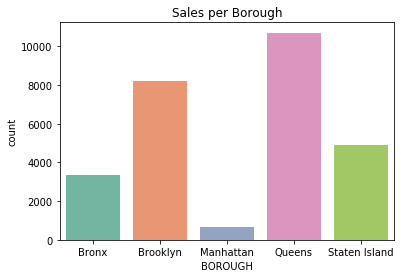

In [4499]:
sns.countplot('BOROUGH',data=df,palette='Set2')
plt.title('Sales per Borough')

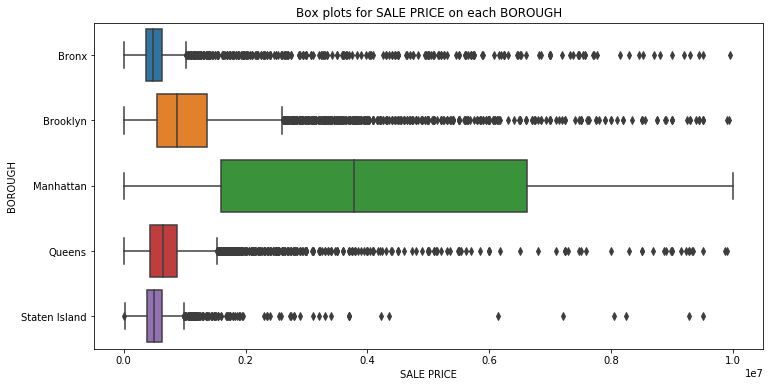

In [4500]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'BOROUGH', x = 'SALE PRICE', data = df )
plt.title('Box plots for SALE PRICE on each BOROUGH')
plt.show()

## Cleaning Year Built

In [4501]:
df['YEAR BUILT'].head(10)

0      1900
3      1913
4      1900
6      1920
172    1910
173    1900
174    1910
195    1899
206    1901
212    1920
Name: YEAR BUILT, dtype: int64

In [4502]:
df['YEAR BUILT'] = df['YEAR BUILT'].astype('category')

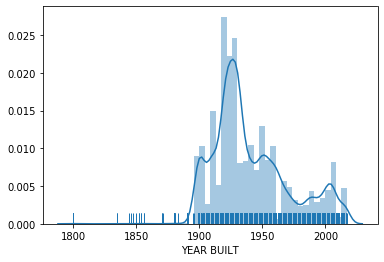

In [4503]:
df=df[df['YEAR BUILT']!=0]
sns.distplot(df['YEAR BUILT'], bins=50, rug=True)
plt.show()

## Cleaning "... Units"

In [4504]:
df['RESIDENTIAL UNITS'].value_counts().head()

1    12655
2     9858
3     2394
0     1024
4      676
Name: RESIDENTIAL UNITS, dtype: int64

In [4505]:
df['COMMERCIAL UNITS'].value_counts().head()

0    25528
1     1661
2      377
3      104
4       61
Name: COMMERCIAL UNITS, dtype: int64

In [4506]:
df = df.drop(['TOTAL UNITS'], axis=1)

## Cleaning Neighborhood

In [4507]:
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('category')

## Overview

In [4508]:
#df.head(10)

In [4509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27832 entries, 0 to 84547
Data columns (total 15 columns):
BOROUGH                           27832 non-null category
NEIGHBORHOOD                      27832 non-null category
BUILDING CLASS CATEGORY           27832 non-null category
TAX CLASS AT PRESENT              27832 non-null category
BUILDING CLASS AT PRESENT         27832 non-null category
RESIDENTIAL UNITS                 27832 non-null int64
COMMERCIAL UNITS                  27832 non-null int64
LAND SQUARE FEET                  27832 non-null float64
GROSS SQUARE FEET                 27832 non-null float64
YEAR BUILT                        27832 non-null category
TAX CLASS AT TIME OF SALE         27832 non-null category
BUILDING CLASS AT TIME OF SALE    27832 non-null category
SALE PRICE                        27832 non-null float64
YEAR SOLD                         27832 non-null int64
MONTH SOLD                        27832 non-null int64
dtypes: category(8), float64(3), int

In [4510]:
df.shape

(27832, 15)

In [4511]:
num_df = df._get_numeric_data()
cat_df = df.drop(df._get_numeric_data(), axis=1)

In [4512]:
print(num_df.shape)
print(cat_df.shape)

(27832, 7)
(27832, 8)


## Data Preprocessing

In [4513]:
df['BOROUGH'].unique()

[Manhattan, Bronx, Brooklyn, Queens, Staten Island]
Categories (5, object): [Manhattan, Bronx, Brooklyn, Queens, Staten Island]

In [4514]:
labelEn = LabelEncoder()
borough_label = labelEn.fit_transform(df['BOROUGH'])
borough_mapping = {index: label for index, label in 
                  enumerate(labelEn.classes_)}

borough_mapping

{0: 'Bronx', 1: 'Brooklyn', 2: 'Manhattan', 3: 'Queens', 4: 'Staten Island'}

In [4515]:
df['NEIGHBORHOOD'].unique()

[ALPHABET CITY, CHELSEA, CHINATOWN, CIVIC CENTER, CLINTON, ..., TRAVIS, WEST NEW BRIGHTON, WESTERLEIGH, WILLOWBROOK, WOODROW]
Length: 245
Categories (245, object): [ALPHABET CITY, CHELSEA, CHINATOWN, CIVIC CENTER, ..., WEST NEW BRIGHTON, WESTERLEIGH, WILLOWBROOK, WOODROW]

In [4516]:
one_hot_features = ['BOROUGH', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT', 
                    'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS CATEGORY']

In [4517]:
one_hot_encoded = pd.get_dummies(df[one_hot_features])

In [4518]:
new_df = df.drop(one_hot_features,axis=1)
new_df = pd.concat([new_df, one_hot_encoded] ,axis=1)

# SALES PREDICTION

## Regression

In [4520]:
y = new_df['SALE PRICE']
x = new_df.drop(['SALE PRICE', 'NEIGHBORHOOD'], axis = 1)

print("The shape of the target set:", y.shape)
print("The shape of the dataset:", x.shape)

The shape of the target set: (27832,)
The shape of the dataset: (27832, 270)


In [4521]:
x_train, x_test , y_train, y_test = train_test_split(x , y, random_state = 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20874, 270)
(20874,)
(6958, 270)
(6958,)


In [4522]:
lr = LinearRegression().fit(X_train , y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

ValueError: could not convert string to float: 'Brooklyn'

## Classification